# **AUTISM DETECTION FROM FACIAL IMAGE**

# Importing necessary packages and modules

In [1]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
import warnings

# Importing the dataset

* Imported the images to train the CNN model
* Converted the images into array
* Resized the converted images

In [2]:
traindatapath="/content/drive/MyDrive/Project/DL Project Data/Autism/train"
X_train=[]
y_train=[]
categories=os.listdir(traindatapath)
for category in categories:
  subdirpath=os.path.join(traindatapath,category)
  images=os.listdir(subdirpath)
  for image in images:
    imagepath=os.path.join(subdirpath,image)
    img=imread(imagepath)
    img_resized=resize(img,(150,150,1))
    X_train.append(img_resized)
    y_train.append(categories.index(category))
  print(category,".....loaded")

autistic .....loaded
non_autistic .....loaded


* Imported the images to test the CNN model
* Converted the images into array
* Resized the converted images

In [3]:
testdatapath="/content/drive/MyDrive/Project/DL Project Data/Autism/test"
X_test=[]
y_test=[]
categories=os.listdir(traindatapath)
for category in categories:
  subdirpath=os.path.join(testdatapath,category)
  images=os.listdir(subdirpath)
  for image in images:
    imagepath=os.path.join(subdirpath,image)
    img=imread(imagepath)
    img_resized=resize(img,(150,150,1))
    X_test.append(img_resized)
    y_test.append(categories.index(category))
  print(category,".....loaded")

autistic .....loaded
non_autistic .....loaded


Checking the length of training and testing dataset

In [4]:
len(X_train),len(y_train)

(2536, 2536)

In [5]:
len(X_test),len(y_test)

(224, 224)

# Converting the dataset to array format from list format

In [6]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

# Buildinng the CNN model

Model consist of
* 3 Convolution layer
* 3 Pooling payer
* 3 Dropout layer
* 1 Flatten layer
* 2 Dense layer

In [7]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150, 150, 1), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=2, activation='softmax'))

# Preparing the model for training

In [8]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training the model

In [9]:
cnn.fit(X_train,y_train,epochs=20,batch_size=15)

Epoch 1/20
170/170 [==============================] - 10s 16ms/step - loss: 0.6497 - accuracy: 0.6278
Epoch 2/20
170/170 [==============================] - 2s 14ms/step - loss: 0.5941 - accuracy: 0.6905
Epoch 3/20
170/170 [==============================] - 2s 15ms/step - loss: 0.5468 - accuracy: 0.7248
Epoch 4/20
170/170 [==============================] - 3s 16ms/step - loss: 0.5157 - accuracy: 0.7453
Epoch 5/20
170/170 [==============================] - 2s 15ms/step - loss: 0.4750 - accuracy: 0.7705
Epoch 6/20
170/170 [==============================] - 2s 14ms/step - loss: 0.4463 - accuracy: 0.7930
Epoch 7/20
170/170 [==============================] - 2s 14ms/step - loss: 0.4494 - accuracy: 0.7819
Epoch 8/20
170/170 [==============================] - 2s 14ms/step - loss: 0.3755 - accuracy: 0.8403
Epoch 9/20
170/170 [==============================] - 3s 15ms/step - loss: 0.3411 - accuracy: 0.8486
Epoch 10/20
170/170 [==============================] - 3s 16ms/step - loss: 0.3114 - accur

# Evaluating the performance of the model with test dataset

In [10]:
cnn.evaluate(X_test,y_test)

7/7 [==============================] - 1s 7ms/step - loss: 0.6852 - accuracy: 0.8214


[0.6852036118507385, 0.8214285969734192]

# Predicting the output with new image

Non Autistic

In [11]:
new_img_path="/content/drive/MyDrive/Project/DL Project Data/Autism/valid/non_autistic/013.jpg"


# Performing necessary preprocessing on new image

In [12]:
new_img=imread(new_img_path)
new_img_resized=resize(new_img,(150,150,1))
new_img_reshaped=new_img_resized.reshape(1,150,150,1)


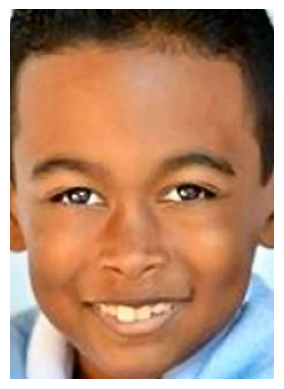

In [13]:
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [14]:
new_img_pred=cnn.predict(new_img_reshaped)

1/1 [==============================] - 0s 117ms/step


In [15]:
new_img_pred=new_img_pred.argmax(axis=1)
new_img_pred

array([1])

In [16]:
cat=categories[new_img_pred.item()]
cat

'non_autistic'

Autistic

In [17]:
new_img_path_1="/content/drive/MyDrive/Project/DL Project Data/Autism/valid/autistic/008.jpg"

In [18]:
new_img=imread(new_img_path_1)
new_img_resized=resize(new_img,(150,150,1))
new_img_reshaped=new_img_resized.reshape(1,150,150,1)

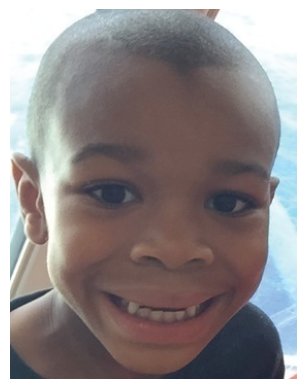

In [19]:
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [20]:
new_img_pred=cnn.predict(new_img_reshaped)

1/1 [==============================] - 0s 19ms/step


In [21]:
new_img_pred=new_img_pred.argmax(axis=1)
new_img_pred

array([0])

In [22]:
cat=categories[new_img_pred.item()]
cat

'autistic'

# Saving the model to build Streamlit wep app

In [23]:
warnings.filterwarnings("ignore")

In [24]:
cnn.save("autism.h5")